# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'
label_file = 'signnames.csv'
ground_label = {}

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(label_file, newline='\n') as f:
    reader = csv.reader(f,delimiter=',')
    for rows in reader:
        ground_label[rows[0]] = rows[1]
    
X_train_bgr, y_train = train['features'], train['labels']
X_valid_bgr, y_valid = valid['features'], valid['labels']
X_test_bgr, y_test = test['features'], test['labels']


assert(len(X_train_bgr) == len(y_train))
assert(len(X_valid_bgr) == len(y_valid))
assert(len(X_test_bgr) == len(y_test))

label: 18
label description: General caution


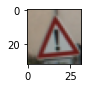

In [2]:
'Display Images'

import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_train_bgr))
image = X_train_bgr[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.savefig('test_images_output/0_TraingSet_RandomFig.jpg')

print('label:',y_train[index])
print('label description:',ground_label[str(y_train[index])])



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


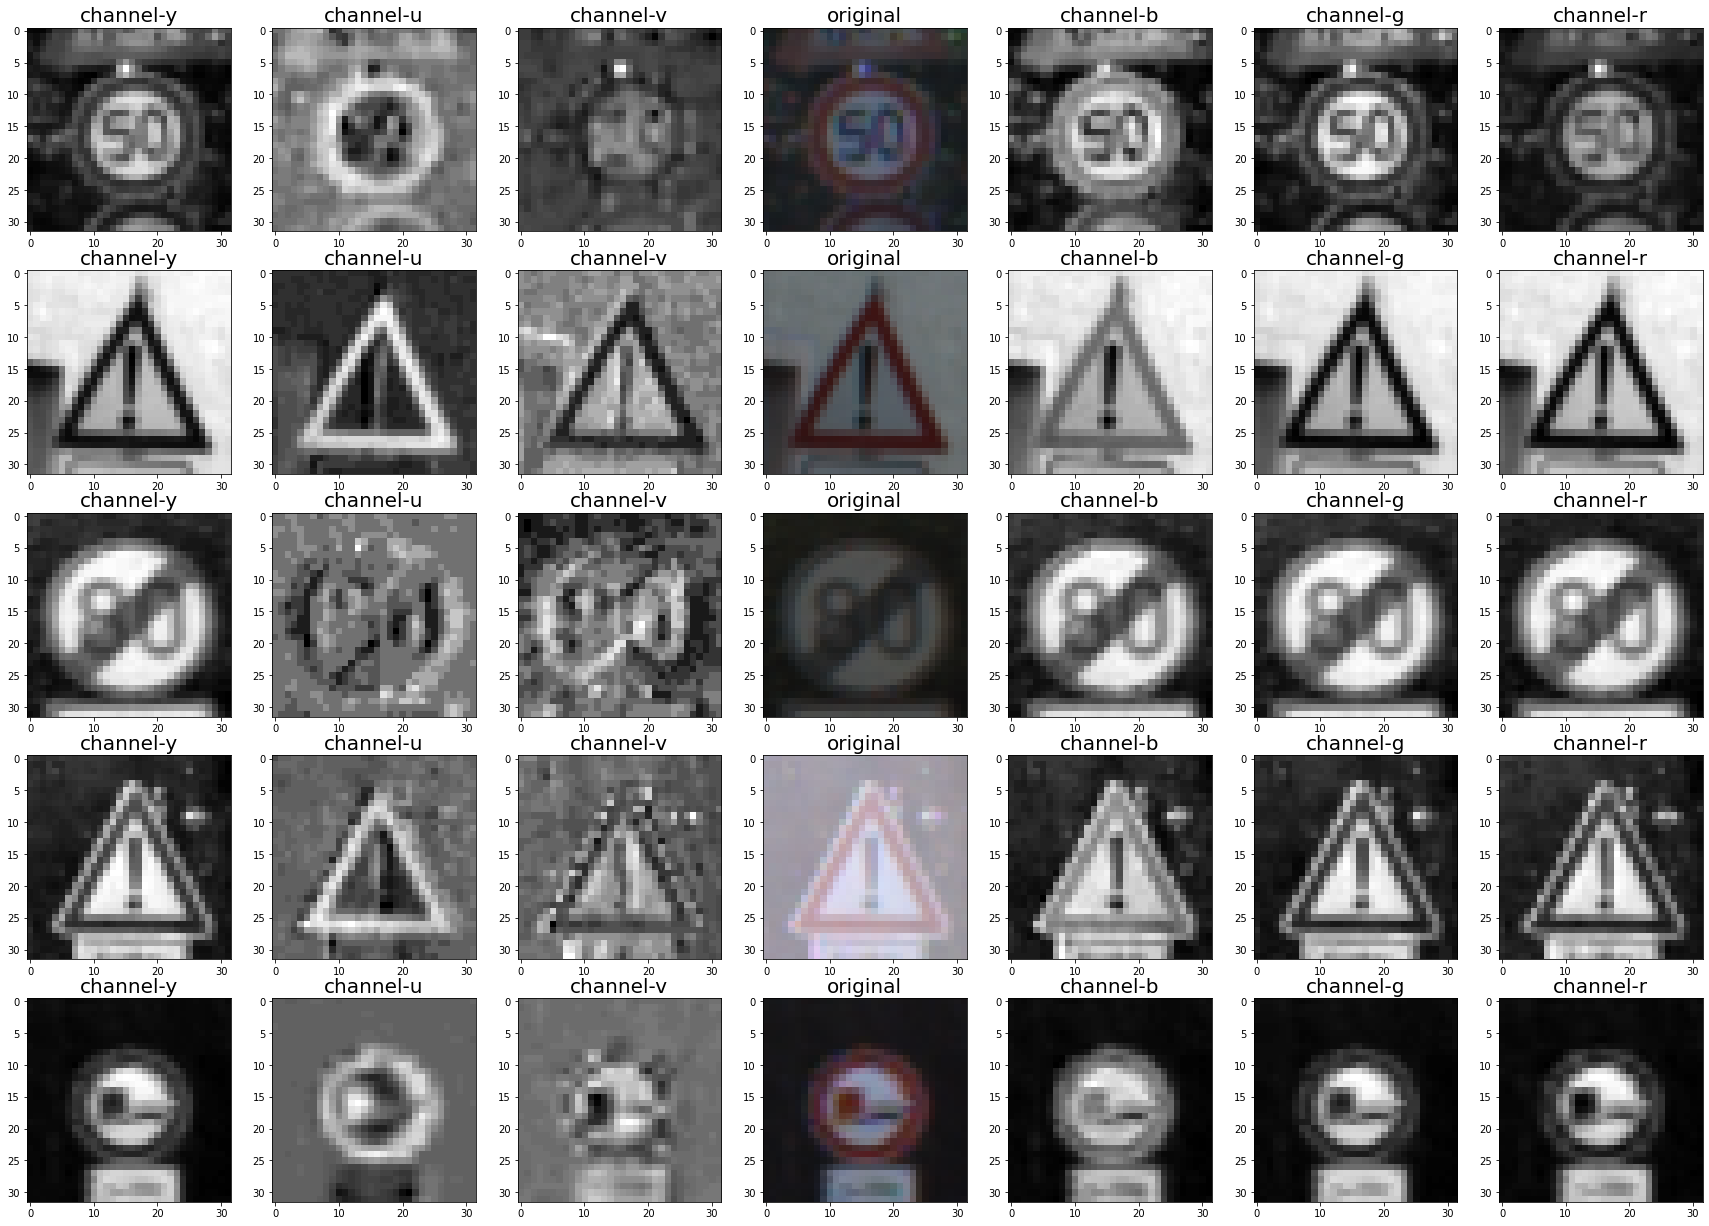

In [3]:
'Select Color Space Channel'

# Display picture with different color channel & different color space
f, a = plt.subplots(5, 7, figsize=(24, 17))
f.tight_layout()

for i in range(5):
    index = random.randint(0,len(X_train_bgr))
    image = cv2.cvtColor(X_train_bgr[index], cv2.COLOR_BGR2YUV)
    channel_name = ['y','u','v','original','b','g','r']
    for j in range(7):
        if j < 3:
            a[i][j].imshow(image[:,:,j],cmap='gray')
            a[i][j].set_title('channel-%s'%channel_name[j], fontsize=20)
        elif j == 3:
            a[i][j].imshow(X_train_bgr[index])
            a[i][j].set_title('%s'%channel_name[j], fontsize=20)
        else:
            a[i][j].imshow(X_train_bgr[index][:,:,j-4],cmap='gray')
            a[i][j].set_title('channel-%s'%channel_name[j], fontsize=20)

f.savefig('test_images_output/1_OriginalImage_ChannelVisulization.jpg')


'''
# B,G,R,Y Color Channel
X_train_yuv = np.array([cv2.cvtColor(X_train_bgr[i], cv2.COLOR_BGR2YUV) for i in range(len(X_train_bgr))])
y,u,v = np.split(X_train_yuv, 3, axis=3)
X_train = np.append(X_train_bgr,y,axis=3)
print("X_train shape is", X_train.shape)

X_valid_yuv = np.array([cv2.cvtColor(X_valid_bgr[i], cv2.COLOR_BGR2YUV) for i in range(len(X_valid_bgr))])
y,u,v = np.split(X_valid_yuv, 3, axis=3)
X_valid = np.append(X_valid_bgr,y,axis=3)
print("X_valid shape is", X_valid.shape)

X_test_yuv = np.array([cv2.cvtColor(X_test_bgr[i], cv2.COLOR_BGR2YUV) for i in range(len(X_test_bgr))])
y,u,v = np.split(X_test_yuv, 3, axis=3)
X_test = np.append(X_test_bgr,y,axis=3)
print("X_test shape is", X_test.shape)
'''

# B,G,R Color Channel
X_train = X_train_bgr
X_valid = X_valid_bgr
X_test = X_test_bgr



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

'Basic Summary of Data Set'
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[index].shape
n_channels = X_train[index].shape[2]

# How many unique classes/labels there are in the dataset.
n_classes = len(ground_label)-1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of channel =", n_channels)
print("Number of classes =", n_classes)

### Include an exploratory visualization of the dataset

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of channel = 3
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


In [5]:
'Data exploration visualization'
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline



def plot_bar(X_img, y_img):
    global n_classes
    global ground_label
    global bar_title
    sample_num_output = []
    
    for i in range(n_classes):
        sample_num = len(X_img[y_img == i])
        sample_num_output.append(sample_num)
    
    fig = plt.figure(figsize=(12,4))
    plt.bar(range(0,n_classes),sample_num_output)
    plt.xlabel('Class Number')
    plt.ylabel('Number of Images')
    plt.title(bar_title)
    plt.show()
    fig.savefig('test_images_output/1_%sDistribution.jpg'%bar_title)

    '''
    'Display the number of sample in each data set of the label used in GTSRB test images'
    label_display = [1,9,23,29,31] #For later test image
    output_dataframe = pd.DataFrame(
        {
            'Label': label_display,
            'Description': [ground_label[str(i)] for i in label_display],
            'Num. of Sample': np.array(sample_num_output)[label_display]
        }
    )
    print(output_dataframe)
    '''
    
    
    return 
    


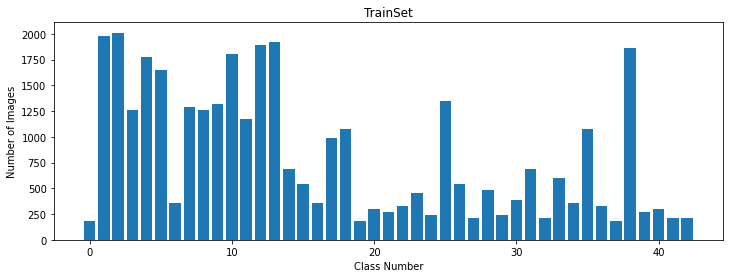

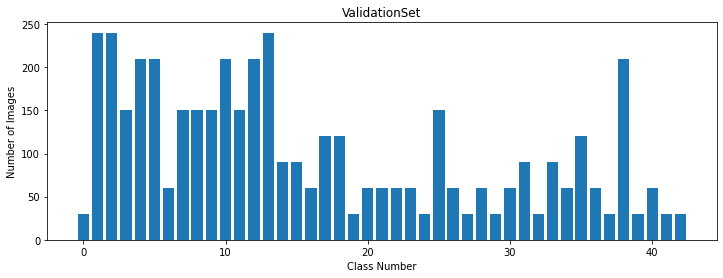

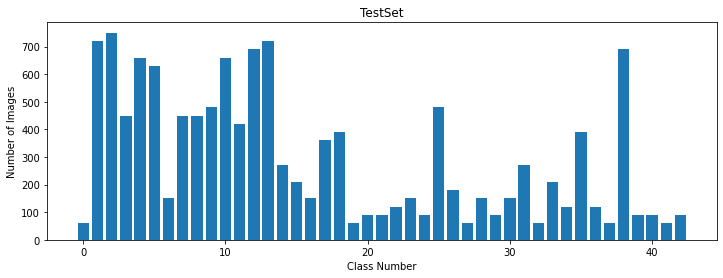

In [6]:

bar_title = 'TrainSet'
plot_bar(X_train_bgr, y_train)

bar_title = 'ValidationSet'
plot_bar(X_valid_bgr, y_valid)

bar_title = 'TestSet'
plot_bar(X_test_bgr, y_test)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [7]:
# Define Image Normalizating Function
from numpy import asarray
from PIL import Image


def img_normal(img, method = 'local', sigma_num = 3):
    
    img_nom = asarray(img)
    # convert from integers to floats
    img_nom = img.astype('float32')
    # calculate per-channel means and standard deviations
    
    if method == 'local':
        means = img_nom.mean(axis=(1,2), dtype='float64') # Take the means along axis 1 & 2
        stds = img_nom.std(axis=(1,2), dtype='float64') # Take the stds along axis 1 & 2
        # per-channel centering of pixels
        for i in range(len(img_nom)):
            # per-channel standarlizing of pixels
            img_nom[i] -= means[i]
            img_nom[i] /= sigma_num*stds[i]
        # confirm it had the desired effect
        means = img_nom.mean(axis=(1,2), dtype='float64')
        stds = img_nom.std(axis=(1,2), dtype='float64')
        print('Means: %s' % means[:3])
        print('stds: %s' % stds[:3])
        print('Mins: %s \nMaxs: %s' % (img_nom.min(axis=(1,2))[:3], img_nom.max(axis=(1,2))[:3]))
    
    elif method == 'global':
        img_nom -= 128
        img_nom /= 128
        # confirm it had the desired effect
        means = X_train_nom.mean(axis=(1,2), dtype='float64')
        print('Means: %s' % means[:3])
        print('Mins: %s \nMaxs: %s' % (X_train_nom.min(axis=(1,2))[:3], X_train_nom.max(axis=(1,2))[:3]))
        
    
    return img_nom

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


'Local Normalized Image'
# Train set
print('\n\nTrain Set')
X_train_nom = img_normal(X_train, 'local') # only top 3 row will be displayed for check purpose

# Valid set
print('\n\nValid Set')
X_valid_nom = img_normal(X_valid, 'local') # only top 3 row will be displayed for check purpose

# Test set
print('\n\nTest Set')
X_test_nom = img_normal(X_test , 'local') # only top 3 row will be displayed for check purpose




Train Set
Means: [[ 2.38605935e-09  7.37372829e-10  7.78072717e-10]
 [-3.49245965e-10 -9.00399755e-11 -4.78394213e-10]
 [ 1.28738975e-09 -1.41028522e-10  1.46769707e-10]]
stds: [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
Mins: [[-0.31661892 -0.28600466 -0.29502174]
 [-0.3078924  -0.27062422 -0.28391567]
 [-0.3232075  -0.29026443 -0.2832524 ]] 
Maxs: [[0.91956675 0.8819529  0.8828423 ]
 [0.89834404 0.91085404 0.9393313 ]
 [0.8781155  0.8825974  0.86758024]]


Valid Set
Means: [[-1.90266292e-09 -1.18177468e-10 -7.26231519e-10]
 [-3.28327587e-10  6.83940016e-10 -1.26351551e-09]
 [ 5.13864507e-10 -1.61458047e-09  2.26964403e-09]]
stds: [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333334 0.33333333]]
Mins: [[-0.33138677 -0.29263738 -0.2756496 ]
 [-0.31480747 -0.29288745 -0.2899394 ]
 [-0.3122329  -0.29023424 -0.28355935]] 
Maxs: [[0.8417581  0.86489    0.8508453 ]
 [0.82333434 0.81

### Model Architecture
My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| **Input**       		| 32x32x3 RGB image   							| 
| **Layer 1**      		|							| 
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 28x28x6 	|
| RELU					|												|
| dropout               | 90% droprate         	                        |
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| **Layer 2**      		|							| 
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 10x10x6 	|
| RELU					|												|
| dropout               | 90% droprate         	                        |
| Max pooling	      	| 2x2 stride,  outputs 5x5x6  			    	|
| **Layer 3**      		|							| 
| Flat             	    | outputs 400  									|
| Fully connected		| outputs 120        							|
| RELU					|												|
| **Layer 4**      		|							| 
| Fully connected		| outputs 84        							|
| RELU					|												|
| **Layer 5**      		|							| 
| Fully connected		| outputs 43        							|
| Softmax				|           									|

hyperparameters are following:
* EPOCHS = 30
* BATCH_SIZE = 100
* LEARN RATE = 0.001
* DROPOUT=0.9


In [20]:
'Set Tensorflow Parameter'

from sklearn.utils import shuffle
import tensorflow as tf

# Shuffle the training data
X_train_nom, y_train = shuffle(X_train_nom, y_train)

# Setup TensorFlow Parameters

EPOCHS = 3
BATCH_SIZE = 100
rate = 0.001
dropout=0.9


In [40]:
'Model Architecture'
# delete the current graph
tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())


def cov2d(x,W,b,strides=1):
    global dropout
    
    x = tf.nn.conv2d(x, W, strides=[1,strides,strides,1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    if not dropout == 0:
        x = tf.nn.dropout(x, dropout)
    
    return x

def maxpool2d(x,k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides=[1,k,k,1], padding='VALID')

def fcon(x,W,b):
    
    fc = tf.nn.bias_add(tf.matmul(x,W),b)
    fc = tf.nn.relu(fc)
    #fc = tf.nn.dropout(fc, dropout)
    
    return fc

def LeNet(x):    
    
    # Network Parameters
    global n_classes  # Traffic Sign Classifier
    global n_channels  # Number of Channel of the Input Image 
    
    # Storage Layer: Weights and biases
    mu = 0
    sigma = 0.1
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5,5,n_channels,6], mean = mu, stddev = sigma),name='wc1'),
        'wc2': tf.Variable(tf.truncated_normal([5,5,6,16], mean = mu, stddev = sigma),name='wc2'),
        'wf3': tf.Variable(tf.truncated_normal([5*5*16,120], mean = mu, stddev = sigma),name='wf3'),
        'wf4': tf.Variable(tf.truncated_normal([120,84], mean = mu, stddev = sigma),name='wf4'),
        'wout': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma),name='wout')}
    tf.summary.histogram('wc1', weights['wc1'])
    

    biases = {
        'bc1': tf.Variable(tf.zeros([6]),name='bc1'),
        'bc2': tf.Variable(tf.zeros([16]),name='bc2'),
        'bf3': tf.Variable(tf.zeros([120]),name='bf3'),
        'bf4': tf.Variable(tf.zeros([84]),name='bf4'),
        'bout': tf.Variable(tf.zeros([n_classes]),name='bout')}
    tf.summary.histogram('bc1', biases['bc1'])

    
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = cov2d(x, weights['wc1'], biases['bc1'])
    print('conv1',conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    print('conv1',conv1)
    #outputFeatureMap(x, conv1)
    

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = cov2d(conv1, weights['wc2'], biases['bc2'])
    print('conv2',conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    print('conv2',conv2)
    

    # Flatten. Input = 5x5x16. Output = 400.
    fc3 = tf.reshape(conv2,[-1,5*5*16])
    print('fc3',fc3)
    
    # Layer 3: Fully Connected. Input = 576. Output = 120.
    fc3 = fcon(fc3,weights['wf3'],biases['bf3'])
    print('fc3',fc3)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = fcon(fc3,weights['wf4'],biases['bf4'])
    print('fc4',fc4)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.nn.bias_add(tf.matmul(fc4,weights['wout']),biases['bout'])
    print('logits',logits)
    
    activations = [conv1,conv2,fc3,fc4,logits]
    
    return logits, activations


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. 
* Underfitting: A **LOW** accuracy on the training + **LOW** accuracy on the validation sets 
* Overfitting: A **HIGH** accuracy on the training + **LOW** accuracy on the validation sets

My final model results were:
* training set accuracy of 99.5%
* validation set accuracy of 94.2%
* test set accuracy of 85.7%

In [41]:
'Define Model Pipeline'

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels),name='x')
y = tf.placeholder(tf.int32, (None),name='y')
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline
with tf.variable_scope('Train'):
    # Loss Function
    with tf.variable_scope('Loss'):
        logits,activations = LeNet(x)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy, name='loss_opeartion')
        train_loss_summary = tf.summary.scalar('Train_loss_summary', loss_operation)
    # Training Function
    with tf.variable_scope('Optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate = rate)
        training_operation = optimizer.minimize(loss_operation)
    # Model Evaluation
    with tf.variable_scope('Accuracy'):
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        train_accuracy_summary = tf.summary.scalar('Train_accuracy_summary', accuracy_operation)
merged = tf.summary.merge_all()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#Define TensorBoard Parameter
# A scalar summary for the scalar tensor
#train_loss_summary = tf.summary.scalar('Train_loss_summary', loss_operation)
#train_accuracy_summary = tf.summary.scalar('Train_accuracy_summary', accuracy_operation)
# ____step 2:____ merge all summaries
#merged = tf.summary.merge_all()



conv1 Tensor("Train/Loss/dropout/mul:0", shape=(?, 28, 28, 6), dtype=float32)
conv1 Tensor("Train/Loss/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
conv2 Tensor("Train/Loss/dropout_1/mul:0", shape=(?, 10, 10, 16), dtype=float32)
conv2 Tensor("Train/Loss/MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
fc3 Tensor("Train/Loss/Reshape:0", shape=(?, 400), dtype=float32)
fc3 Tensor("Train/Loss/Relu_2:0", shape=(?, 120), dtype=float32)
fc4 Tensor("Train/Loss/Relu_3:0", shape=(?, 84), dtype=float32)
logits Tensor("Train/Loss/BiasAdd_4:0", shape=(?, 43), dtype=float32)


In [42]:
'Train the Model'
train_accuracy_output = []
valid_accuracy_output = []
train_loss_output = []
valid_loss_output = []
saver = tf.train.Saver()
global_step = 0


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_nom)
    # ____step 3:____ creating the writer inside the session
    train_writer = tf.summary.FileWriter('./graphs', sess.graph)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_nom, y_train = shuffle(X_train_nom, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            global_step += 1
            batch_x, batch_y = X_train_nom[offset:end], y_train[offset:end]
            _, summary_tr = sess.run([training_operation,merged], feed_dict={x: batch_x, y: batch_y})
            train_writer.add_summary(summary_tr, global_step)
        
        #train_accuracy = evaluate(X_train_nom, y_train)
        train_accuracy_output.append(train_accuracy)
        #train_loss = sess.run(loss_operation,feed_dict={x: X_train_nom, y: y_train})
        train_loss_output.append(train_loss)
            
        valid_accuracy, valid_loss = sess.run([accuracy_operation,loss_operation], feed_dict={x: X_valid_nom, y: y_valid})
        #valid_accuracy = evaluate(X_valid_nom, y_valid)
        valid_accuracy_output.append(valid_accuracy)
        #valid_loss = sess.run(loss_operation,feed_dict={x: X_valid_nom, y: y_valid})
        valid_loss_output.append(valid_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Train Loss = {:.3f}".format(train_loss))
        print("Validation Accuracy = {:.3f}".format(valid_accuracy))
        print("Validation Loss = {:.3f}".format(valid_loss))
        print()
        
        
        # Learn rate degradation.
        # Decrease 10% learn rate when 4 consecutive increasing accuracy less than 1%
        if len(train_accuracy_output) > 4 and \
        (((max(train_accuracy_output[-4:])-min(train_accuracy_output[-4:]))<0.01) or \
         ((max(valid_accuracy_output[-4:])-min(valid_accuracy_output[-4:]))<0.01)):
            rate *= 0.9
            print('Decreate rate to %.5f'%rate)
        
        if valid_accuracy > 0.94:
            break
        
            
        
    saver.save(sess, './TensorBoardTrail')
    print("Model saved")


Training...

EPOCH 1 ...
Train Accuracy = 0.910
Train Loss = 0.322
Validation Accuracy = 0.815
Validation Loss = 0.587

EPOCH 2 ...
Train Accuracy = 0.910
Train Loss = 0.322
Validation Accuracy = 0.876
Validation Loss = 0.431

EPOCH 3 ...
Train Accuracy = 0.910
Train Loss = 0.322
Validation Accuracy = 0.884
Validation Loss = 0.407

Model saved


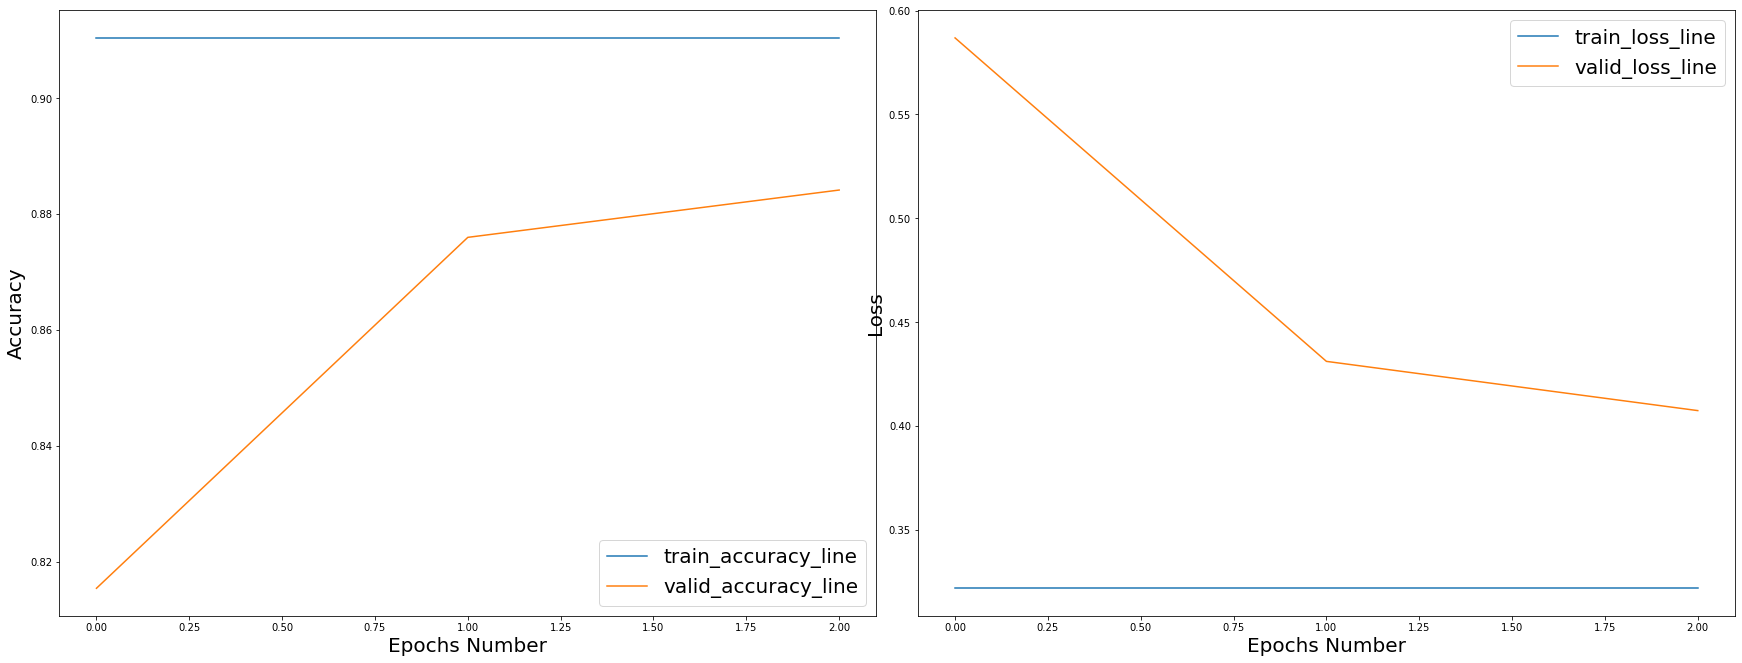

In [43]:
'Visulizing The Accuracy & Loss Output'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

train_accuracy_line, = ax1.plot(np.arange(0,len(train_accuracy_output)), train_accuracy_output)
valid_accuracy_line, = ax1.plot(np.arange(0,len(valid_accuracy_output)), valid_accuracy_output)
ax1.legend([train_accuracy_line, valid_accuracy_line], ['train_accuracy_line', 'valid_accuracy_line'],fontsize=20)
ax1.set_xlabel('Epochs Number',fontsize=20)  # Add an x-label to the axes.
ax1.set_ylabel('Accuracy', fontsize=20)  # Add a y-label to the axes.

train_loss_line, = ax2.plot(np.arange(0,len(train_loss_output)), train_loss_output)
valid_loss_line, = ax2.plot(np.arange(0,len(valid_loss_output)), valid_loss_output)
ax2.legend([train_loss_line, valid_loss_line], ['train_loss_line', 'valid_loss_line'],fontsize=20)
ax2.set_xlabel('Epochs Number',fontsize=20)  # Add an x-label to the axes.
ax2.set_ylabel('Loss', fontsize=20)  # Add a y-label to the axes.

f.savefig('test_images_output/2_test_images_output.jpg')

In [ ]:
'Test Set Validation'


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



# Checkpoint
Run cells below without re-training the model.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
'Import Libiary'
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pickle
import csv
from numpy import asarray
from PIL import Image
import re
import os
%matplotlib inline


'Load Ground Label'
label_file = 'signnames.csv'
ground_label = {}

with open(label_file, newline='\n') as f:
    reader = csv.reader(f,delimiter=',')
    for rows in reader:
        ground_label[rows[0]] = rows[1]




### Load and Output the Images

In [ ]:
'Load and Plot the Images'

def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    
    global label_display
    
    images_output = [] # images
    labels_output = [] # corresponding labels
    
    for c in label_display:
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        directory = os.listdir(prefix)
        for filename in directory:
            if filename[-4:] == '.ppm':
                image = plt.imread(prefix + filename)
                dst = cv2.resize(image,(32,32),interpolation = cv2.INTER_AREA)
                images_output.append(dst)
        labels_output.append(c)

    return np.array(images_output), np.array(labels_output)

def img_normal(img, method = 'local', sigma_num = 3):
    
    img_nom = asarray(img)
    # convert from integers to floats
    img_nom = img.astype('float32')
    # calculate per-channel means and standard deviations
    
    if method == 'local':
        means = img_nom.mean(axis=(1,2), dtype='float64') # Take the means along axis 1 & 2
        stds = img_nom.std(axis=(1,2), dtype='float64') # Take the stds along axis 1 & 2
        # per-channel centering of pixels
        for i in range(len(img_nom)):
            # per-channel standarlizing of pixels
            img_nom[i] -= means[i]
            img_nom[i] /= sigma_num*stds[i]
        # confirm it had the desired effect
        means = img_nom.mean(axis=(1,2), dtype='float64')
        stds = img_nom.std(axis=(1,2), dtype='float64')
        print('Means: %s' % means[:3])
        print('stds: %s' % stds[:3])
        print('Mins: %s \nMaxs: %s' % (img_nom.min(axis=(1,2))[:3], img_nom.max(axis=(1,2))[:3]))
    
    elif method == 'global':
        img_nom -= 128
        img_nom /= 128
        # confirm it had the desired effect
        means = X_train_nom.mean(axis=(1,2), dtype='float64')
        print('Means: %s' % means[:3])
        print('Mins: %s \nMaxs: %s' % (X_train_nom.min(axis=(1,2))[:3], X_train_nom.max(axis=(1,2))[:3]))
         
    return img_nom


Number of selected label in training set.


| Label			        |     Description	      | Num. of Sample in Training Set 		|
|:---------------------:|:-----------------------:|:----------------------:|
| 1   		| Speed limit (30km/h)  			|		1980|
| 9     			| No passing				|		1320|
| 23				| Slippery road				|		450	|
| 29      		| Bicycles crossing				|	 	240	|
| 31		| Wild animals crossing    			|		690	|


In [ ]:
'Test Image Loading'
label_display = [1,9,23,29,31] # Numbers are selected based on the number of sample in training data set
X_GTSRB_bgr, y_GTSRB = readTrafficSigns('test_images/GTSRB') # arguments: path to the traffic sign data, for example './GTSRB/Training'
assert(len(X_GTSRB_bgr) == len(y_GTSRB))
#assert(X_GTSRB_bgr[0].shape == X_train_bgr[0].shape) #make sure size of the image match


#print basic image info
index = random.randint(0,len(X_GTSRB_bgr)-1)
n_GTSRB = len(X_GTSRB_bgr)
n_classes = len(ground_label)-1

print("Number of GTSRB examples =", n_GTSRB)
print("Image data shape =", X_GTSRB_bgr[index].shape)
print("Number of classes =", n_classes)


#display image
f, a = plt.subplots(1,5, figsize=(24,7))
for i in range(len(X_GTSRB_bgr)):
    a[i].imshow(X_GTSRB_bgr[i])
    a[i].set_title('%s'%ground_label[str(label_display[i])],fontsize=20)
f.savefig('./test_images_output/3_GTSRBTrafficSign.jpg')



In [ ]:
'Local Normalized Image'
# GTSRB set
print('\n\nTrain Set')
X_GTSRB = X_GTSRB_bgr # Use BGR channel for analysis
X_GTSRB_nom = img_normal(X_GTSRB, 'local')


### Predict the Sign Type for Each Image

In [ ]:
'Model Architecture'

def predict(x):
    return tf.nn.softmax(x)

def cov2d(x,W,b,strides=1,dropout=0.9):
    
    x = tf.nn.conv2d(x, W, strides=[1,strides,strides,1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    if not dropout == 0:
        x = tf.nn.dropout(x, dropout)
    
    return x

def maxpool2d(x,k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides=[1,k,k,1], padding='VALID')

def fcon(x,W,b):
    
    fc = tf.nn.bias_add(tf.matmul(x,W),b)
    fc = tf.nn.relu(fc)
    #fc = tf.nn.dropout(fc, dropout)
    
    return fc

def LeNet(x):    
    global weights
    global biases
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = cov2d(x, weights['wc1'], biases['bc1'])
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = cov2d(conv1, weights['wc2'], biases['bc2'])
    # Pooling. Input = 10x10x16. Output = 6x6x16.
    conv2 = maxpool2d(conv2)

    # Flatten. Input = 5x5x16. Output = 576.
    fc3 = tf.reshape(conv2,[-1,5*5*16])
    
    # Layer 3: Fully Connected. Input = 576. Output = 120.
    fc3 = fcon(fc3,weights['wf3'],biases['bf3'])

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = fcon(fc3,weights['wf4'],biases['bf4'])

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.nn.bias_add(tf.matmul(fc4,weights['wout']),biases['bout'])
    
    return logits

def evaluate(X_data, y_data, BATCH_SIZE=128):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [ ]:
'Run Prediction Session'

# delete the current graph
tf.reset_default_graph()

# import the graph from the file
imported_graph = tf.train.import_meta_graph('saved_variable.meta')

# run the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # restore the saved vairable
    imported_graph.restore(sess, './saved_variable')
    # load the weights and biases
    wc1,wc2,wf3,wf4,wout  = sess.run(['wc1:0','wc2:0','wf3:0','wf4:0','wout:0'])
    weights = {'wc1':wc1, 'wc2':wc2, 'wf3':wf3, 'wf4':wf4, 'wout':wout}
    bc1,bc2,bf3,bf4,bout  = sess.run(['bc1:0','bc2:0','bf3:0','bf4:0','bout:0'])
    biases = {'bc1':bc1, 'bc2':bc2, 'bf3':bf3, 'bf4':bf4, 'bout':bout}
    
    'Feature and Label'
    x = tf.placeholder(tf.float32, (None, 32, 32, 3),name='X')
    y = tf.placeholder(tf.int32, (None),name='Y')
    one_hot_y = tf.one_hot(y, n_classes)
    
    
    'Model Prediction'
    logits = LeNet(x)
    pred = predict(logits)
    pred = sess.run(pred,feed_dict={x : X_GTSRB_nom})
    pred_top5 = sess.run(tf.nn.top_k(pred, k=5))
    pred_label = [ground_label[str(int(i))] for i in pred_top5[1][:,:1]]
    actual_label = [ground_label[str(i)] for i in label_display]
    
    'Model Evaluation'
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    GTSRB_accuracy = evaluate(X_GTSRB_nom, y_GTSRB)
    

    

### Analyze Performance

In [ ]:
'Output Performance'
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


print('\n\nGTSRB_accuracy is %.2f%%'%(100*GTSRB_accuracy))
output_dataframe = pd.DataFrame(
    {
        'Label': label_display,
        'Ground Label': actual_label,
        'Prediction Label': pred_label,
        'Is it correct?': pred_label == actual_label,
    }
)
output_dataframe

    


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 


In [ ]:
'Output Top 5 Possibility'
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


f, a = plt.subplots(5, 2, figsize=(12,24))

for i in range(len(label_display)):
    x_labels = [str(j) for j in pred_top5[1][i]]
    a[i][0].bar(x_labels,pred_top5[0][i])
    a[i][0].set_xlabel('Label', fontsize=20)
    a[i][0].set_ylabel('Probability', fontsize=20)
    a[i][1].imshow(X_GTSRB_bgr[i])
    a[i][1].set_title('%s'%ground_label[str(label_display[i])],fontsize=20)

f.savefig('test_images_output/3_Top5BarPlot.jpg')

perf_dataframe = pd.DataFrame(
    {
        'Label': label_display,
        'Ground Label': actual_label,
        'Top 1 %':pred_top5[0][:,0],
        'Label 1':[ground_label[str(pred_top5[1][:,0][i])] for i in range(5)],
        'Top 2 %':pred_top5[0][:,1],
        'Label 2':[ground_label[str(pred_top5[1][:,1][i])] for i in range(5)],
        'Top 3 %':pred_top5[0][:,2],
        'Label 3':[ground_label[str(pred_top5[1][:,2][i])] for i in range(5)],
        'Top 4 %':pred_top5[0][:,3],
        'Label 4':[ground_label[str(pred_top5[1][:,3][i])] for i in range(5)],
        'Top 5 %':pred_top5[0][:,4],
        'Label 5':[ground_label[str(pred_top5[1][:,4][i])] for i in range(5)],
    }
)
perf_dataframe
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="examples/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry


'Not sure how it works yet'
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    sess = tf.get_default_session()
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    print("activation.shape is",activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
  

'''
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #outputFeatureMap(np.reshape(X_train_nom[3],(1,32,32,n_channels)), activations[0])
    outputFeatureMap(np.reshape(X_train_nom[3],(1,32,32,n_channels)), activations[2])
'''

            